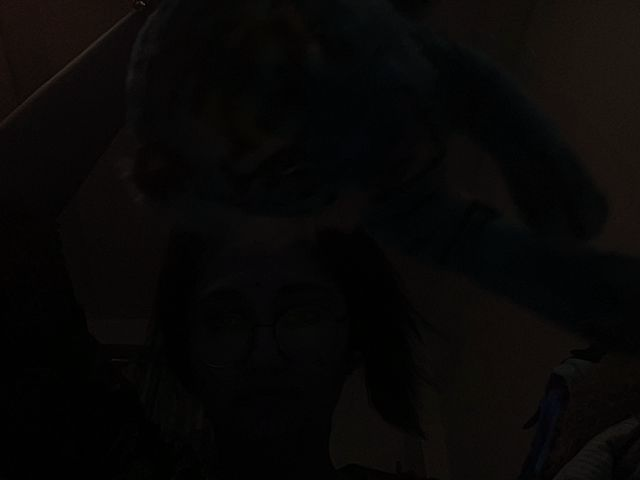

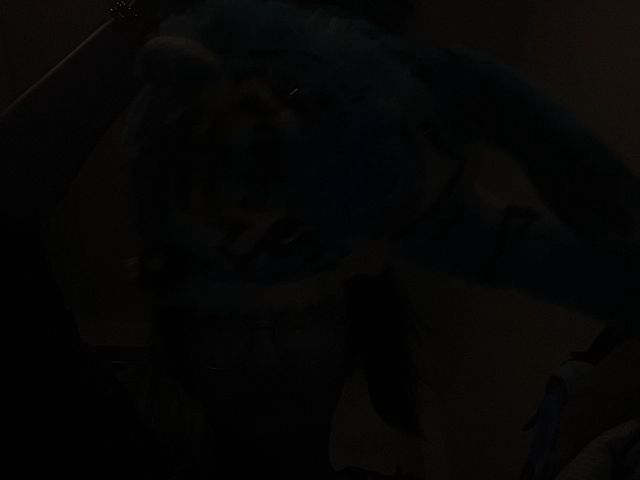

Edge Detection:


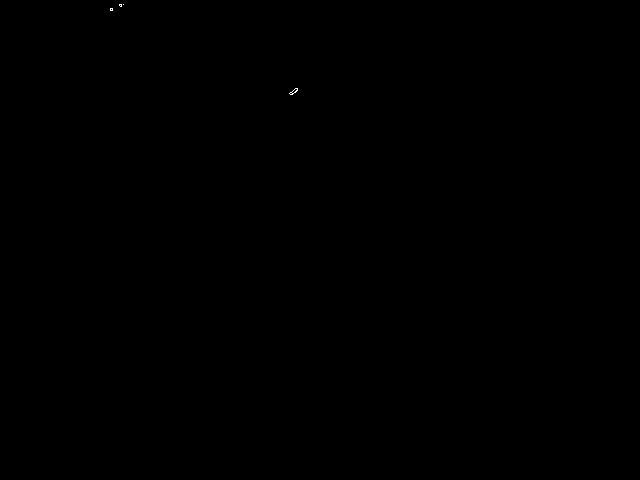

Optical Flow Tracking:


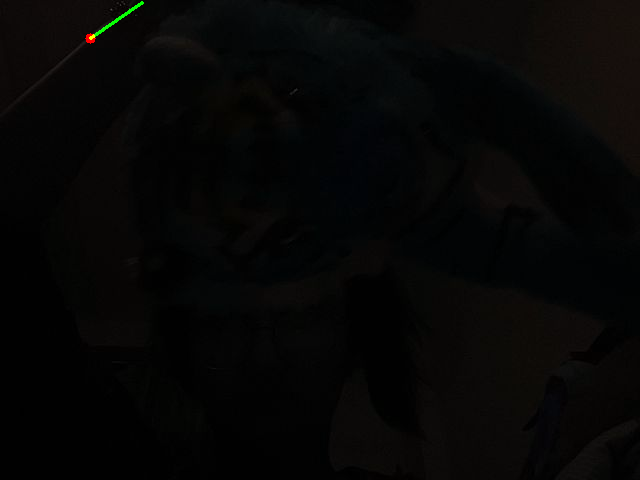

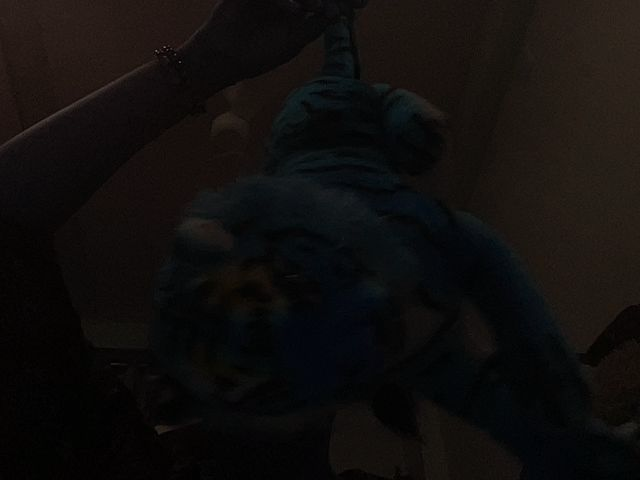

Edge Detection:


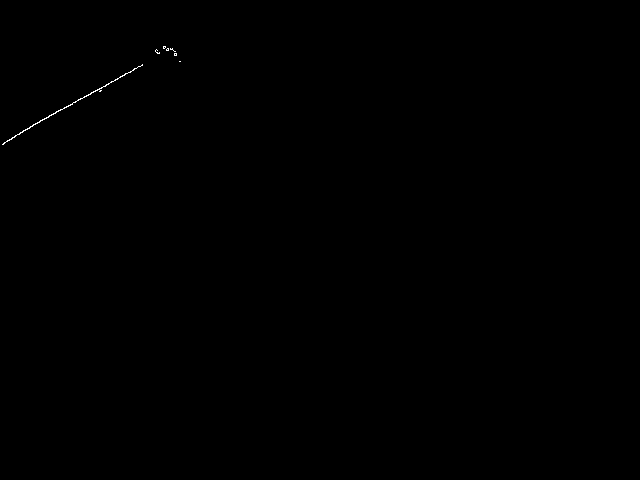

Optical Flow Tracking:


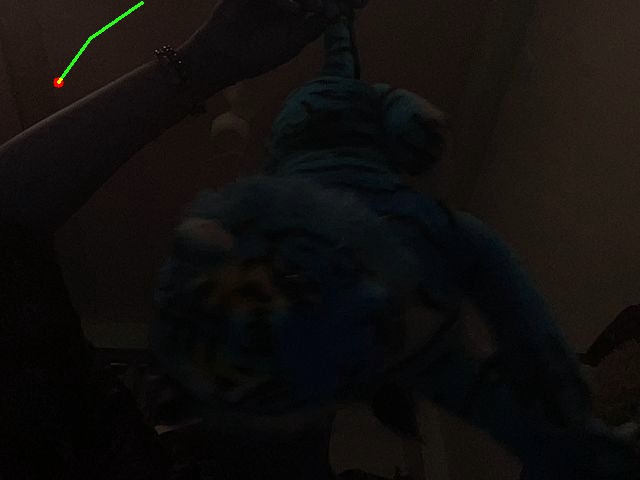

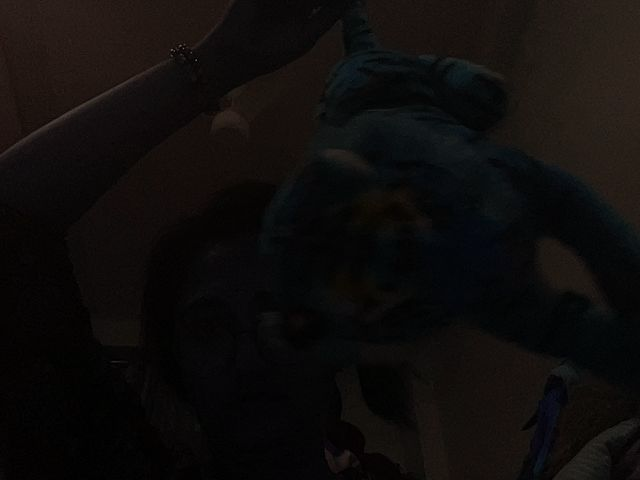

Edge Detection:


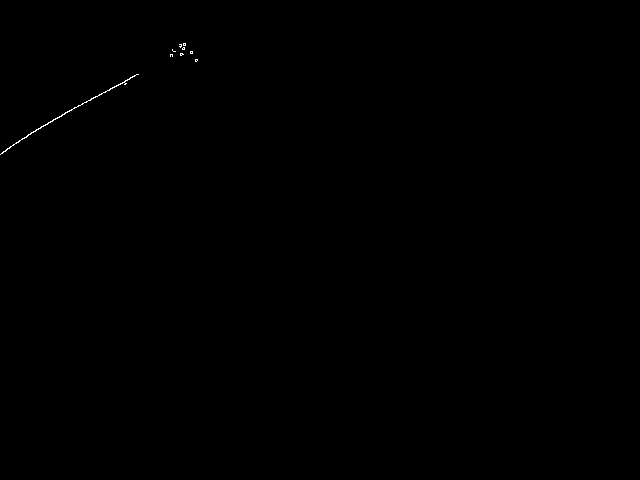

Optical Flow Tracking:


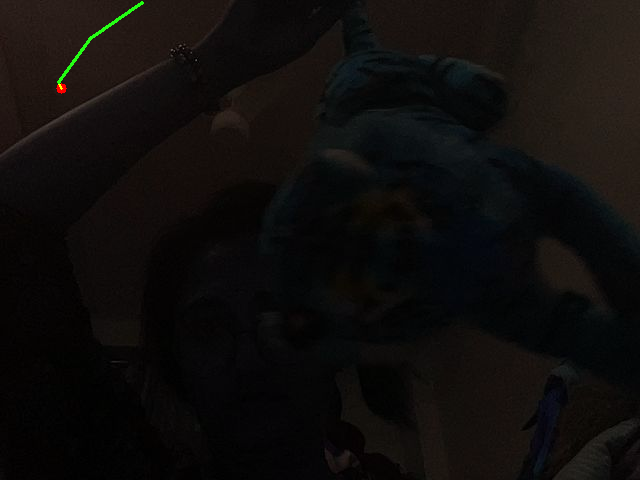

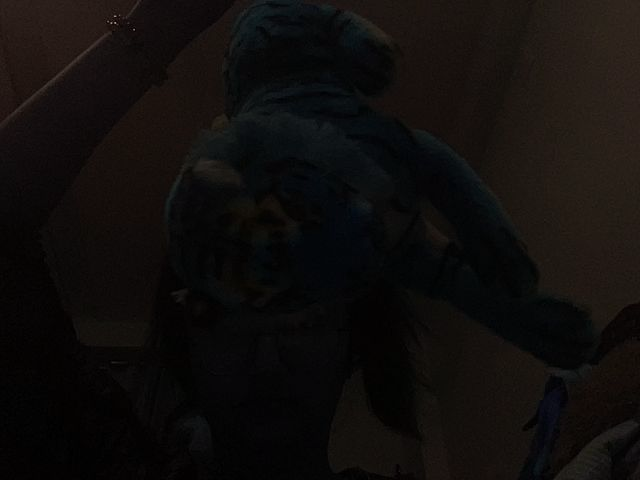

Edge Detection:


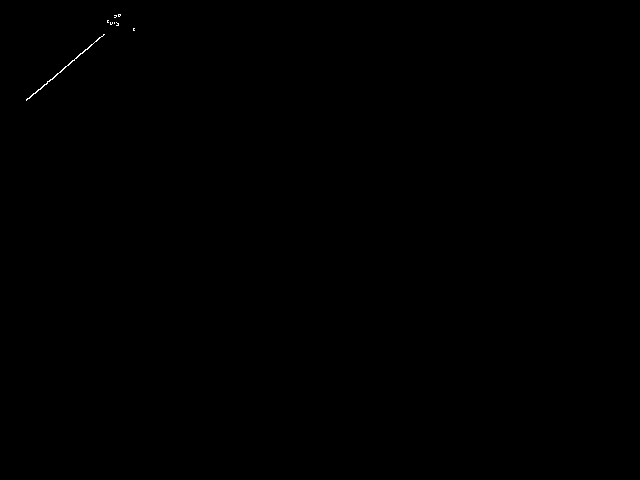

Optical Flow Tracking:


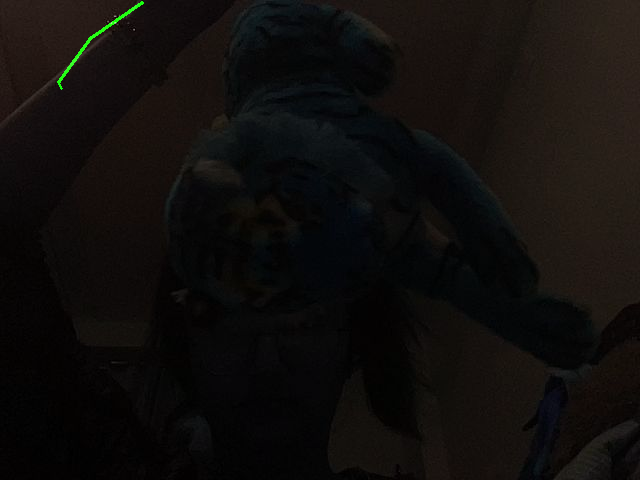

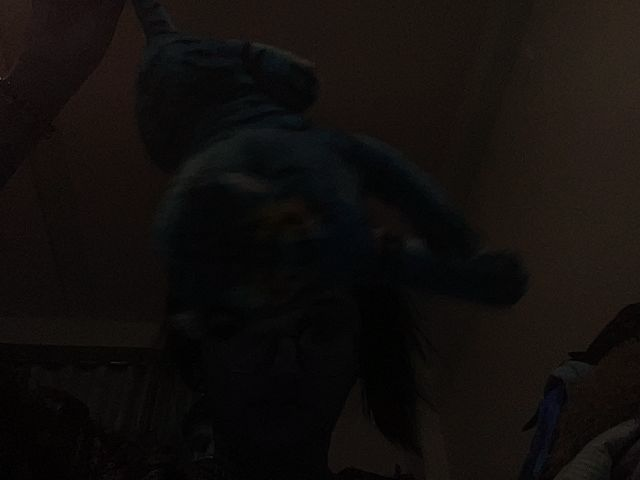

Edge Detection:


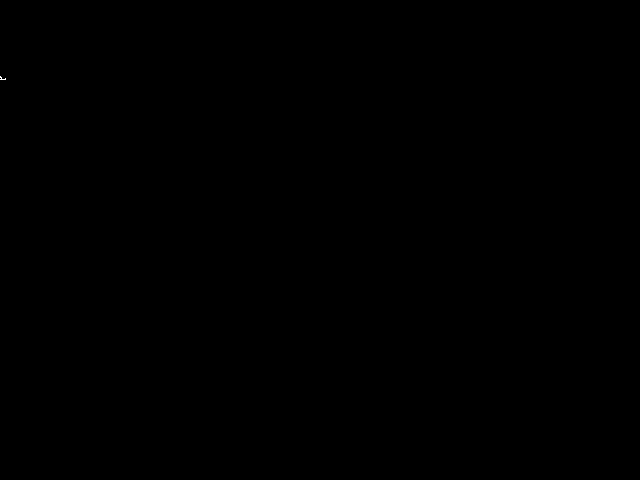

Optical Flow Tracking:


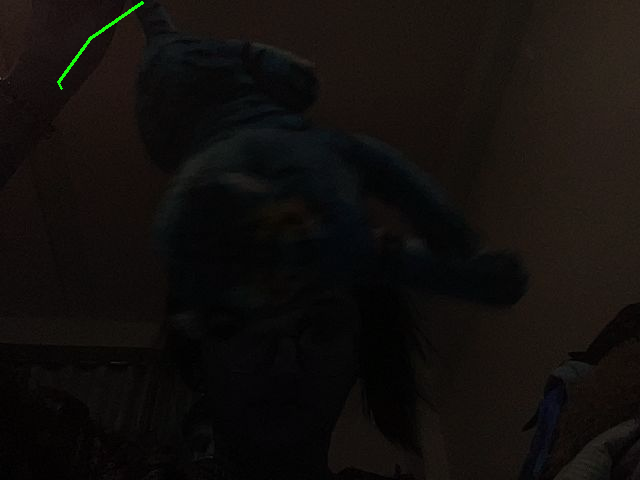

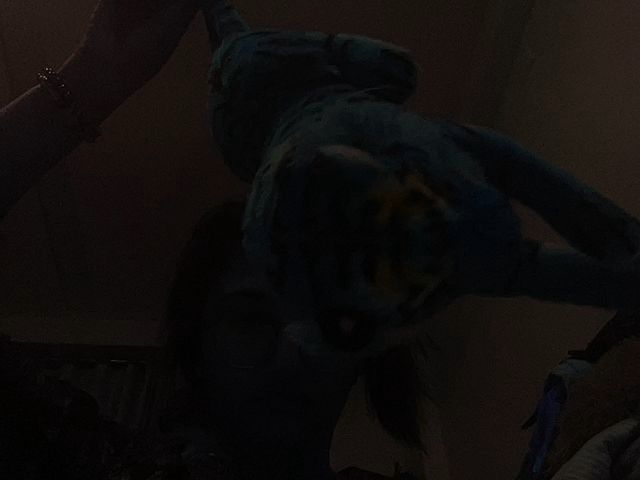

Edge Detection:


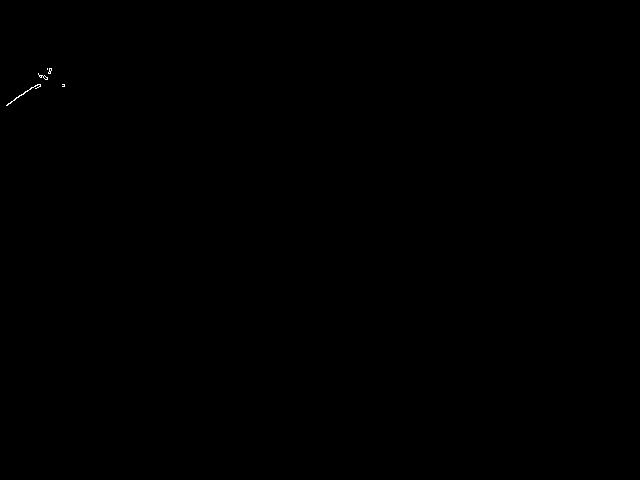

Optical Flow Tracking:


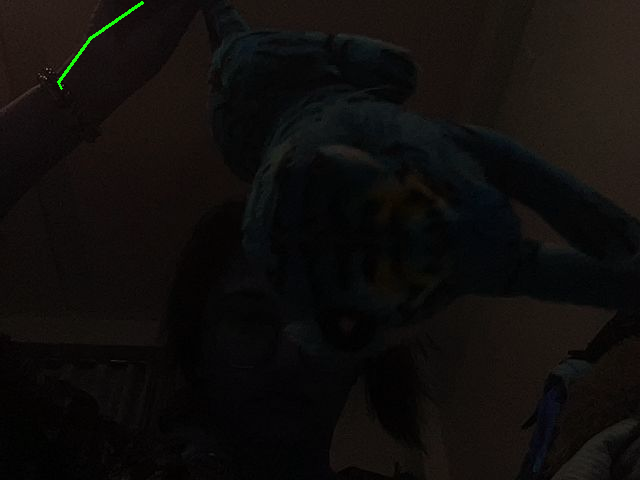

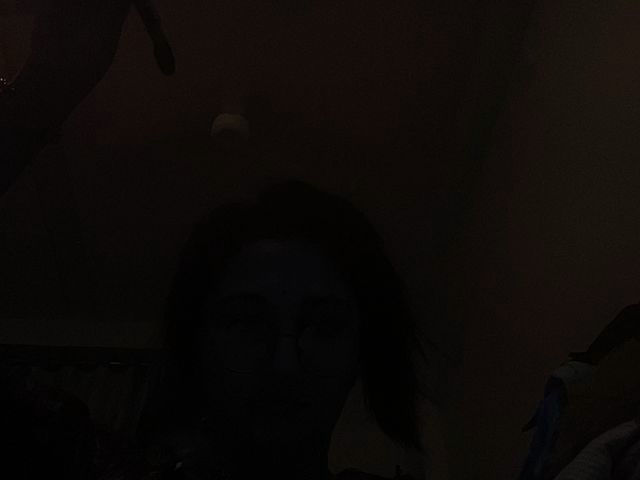

Edge Detection:


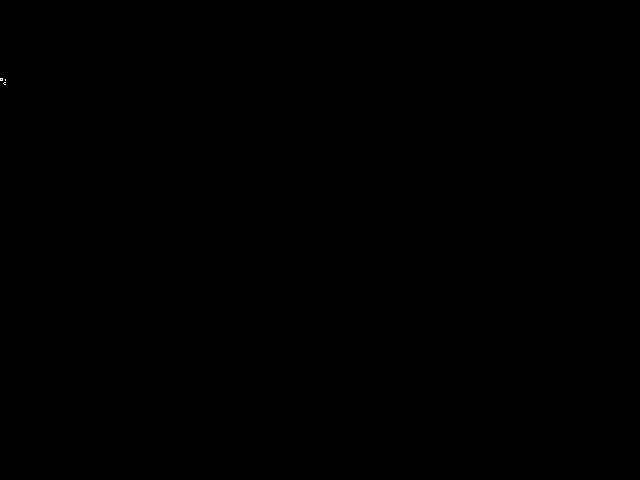

Optical Flow Tracking:


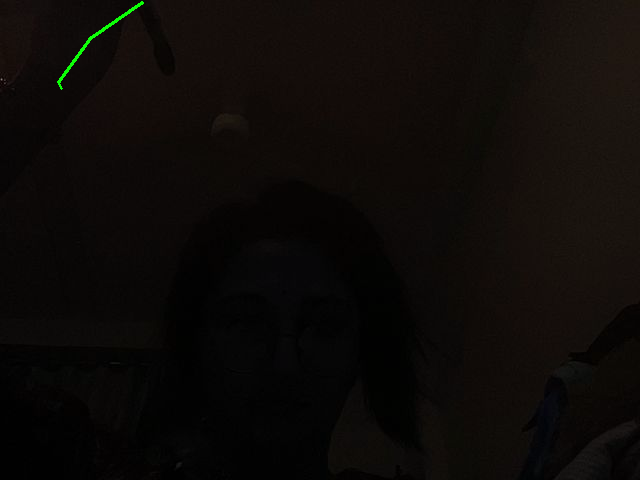

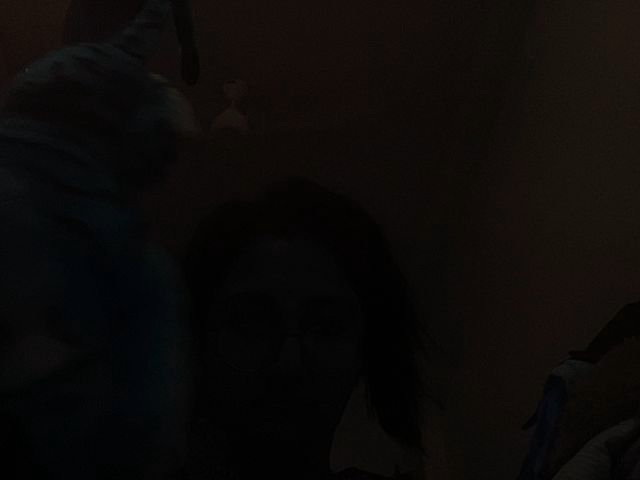

Edge Detection:


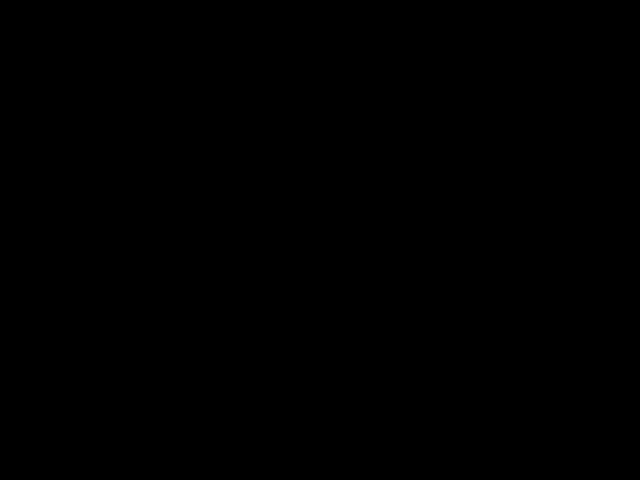

Optical Flow Tracking:


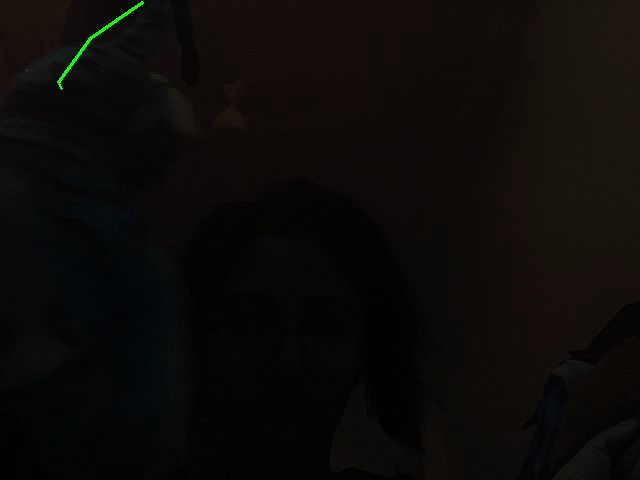

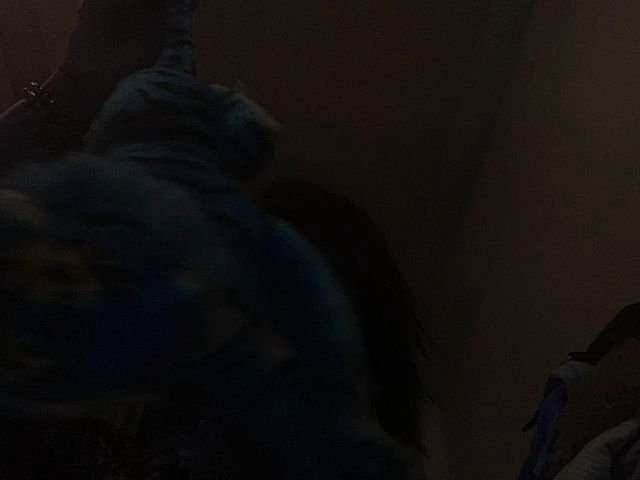

Edge Detection:


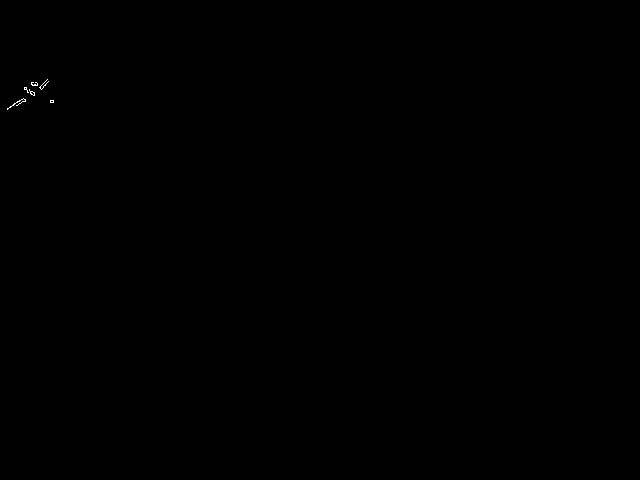

Optical Flow Tracking:


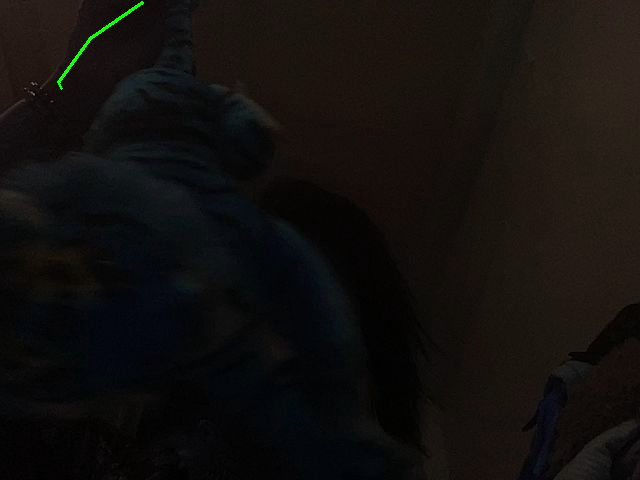

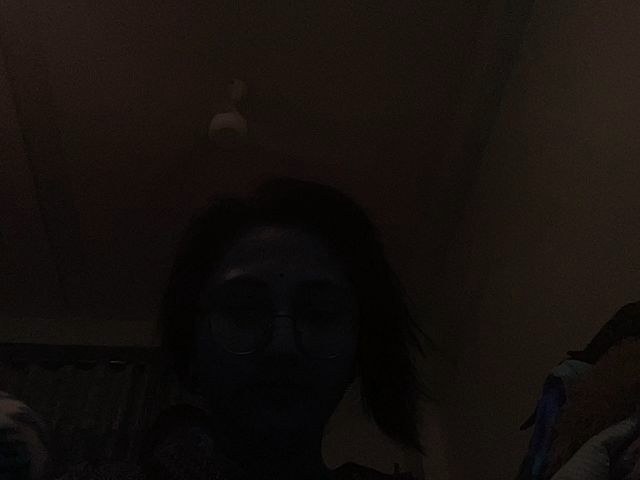

Edge Detection:


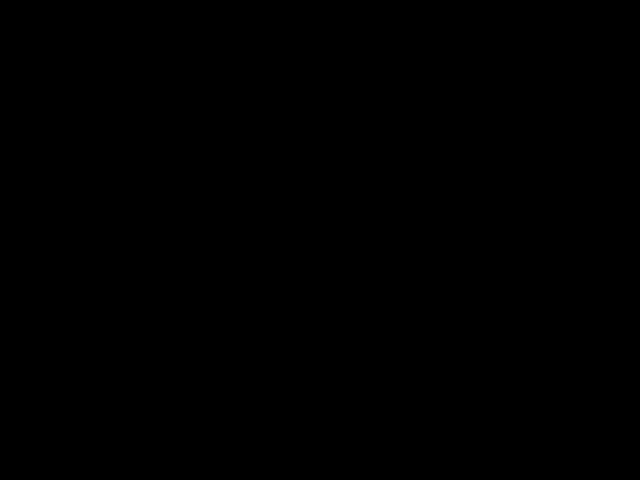

Optical Flow Tracking:


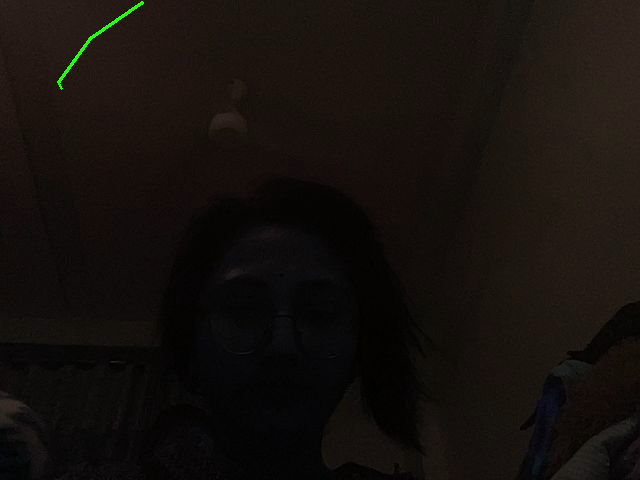

Simulation Complete!


In [ ]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io

# JavaScript to capture webcam frames
def take_photo():
    js_code = '''
        async function takePhoto() {
            const div = document.createElement('div');
            document.body.appendChild(div);
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0, canvas.width, canvas.height);

            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhoto();
    '''
    return eval_js(js_code)  # Corrected: Removed the redundant return statement

# Capture an initial frame
def get_frame():
    image_data = take_photo()
    image_bytes = b64decode(image_data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(image_bytes))
    return np.array(image)

# Initialize first frame for Optical Flow
old_frame = get_frame()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_RGB2GRAY)
cv2_imshow(old_frame)

# Parameters for Shi-Tomasi corner detection (Feature Extraction
# Parameters for Shi-Tomasi corner detection (Good Features to Track)
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Detect initial features
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create mask for drawing optical flow lines
mask = np.zeros_like(old_frame)

# Process webcam frames in a loop
for i in range(10):  # Capture 10 frames (change as needed)
    frame = get_frame()
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cv2_imshow(frame)
    # Apply Edge Detection (Feature Extraction)
    edges = cv2.Canny(gray, 100, 200)

    # Optical Flow Tracking (Motion Detection)
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, gray, p0, None, **lk_params)

    if p1 is not None:
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), (0, 255, 0), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, (0, 0, 255), -1)

    img = cv2.add(frame, mask)

    # Display results
    print("Edge Detection:")
    cv2_imshow(edges)  # Show edges
    print("Optical Flow Tracking:")
    cv2_imshow(img)  # Show optical flow tracking

    old_gray = gray.copy()
    p0 = good_new.reshape(-1, 1, 2)

print("Simulation Complete!")


Edge Detection:


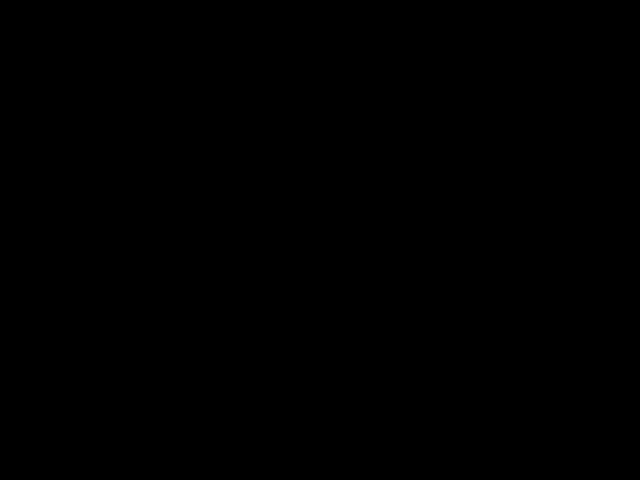

Multi-Colored Optical Flow Tracking:


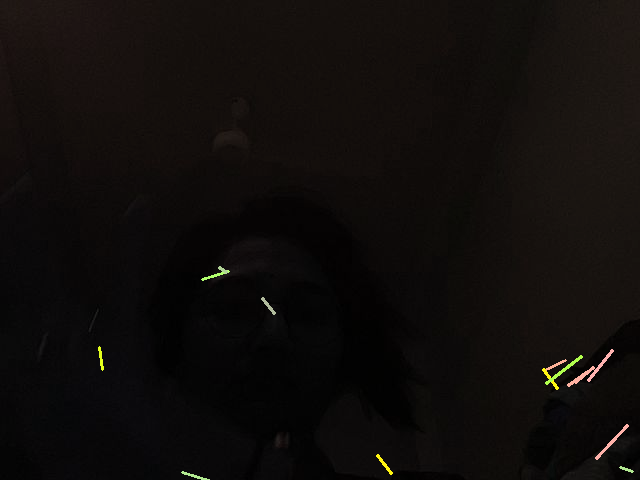

Edge Detection:


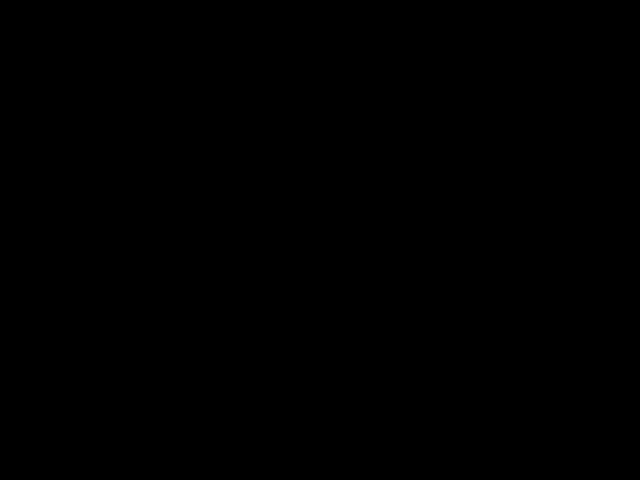

Multi-Colored Optical Flow Tracking:


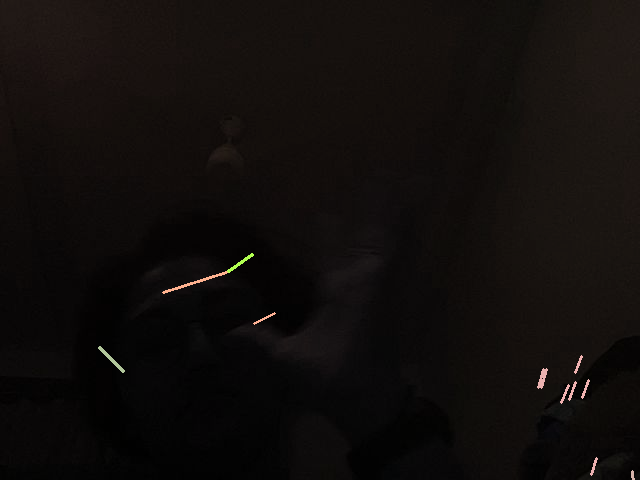

Edge Detection:


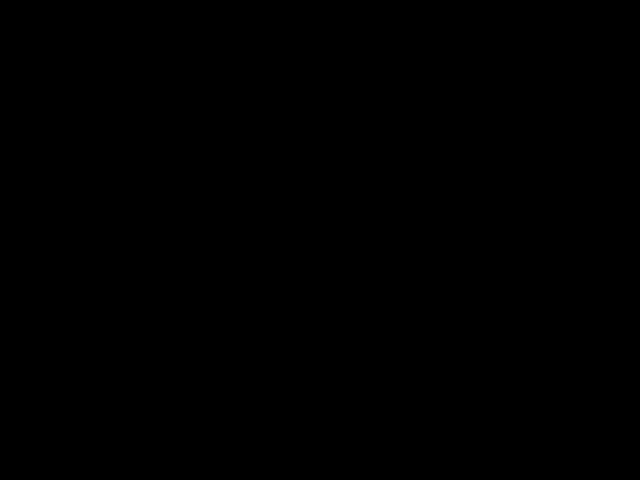

Multi-Colored Optical Flow Tracking:


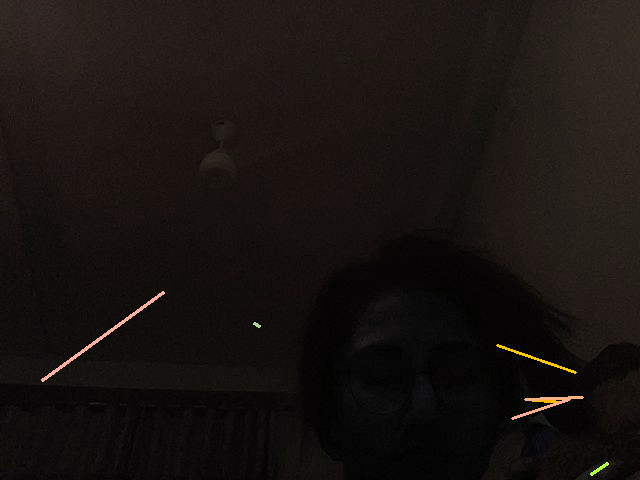

Edge Detection:


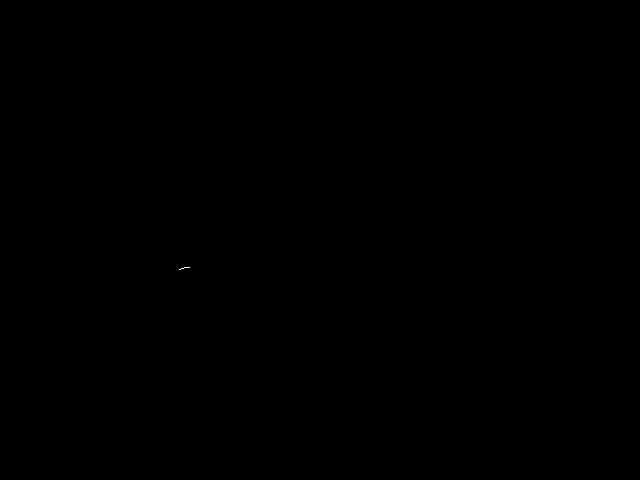

Multi-Colored Optical Flow Tracking:


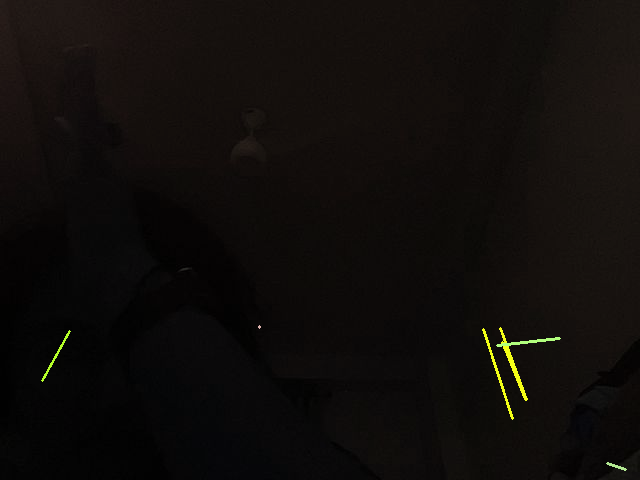

Edge Detection:


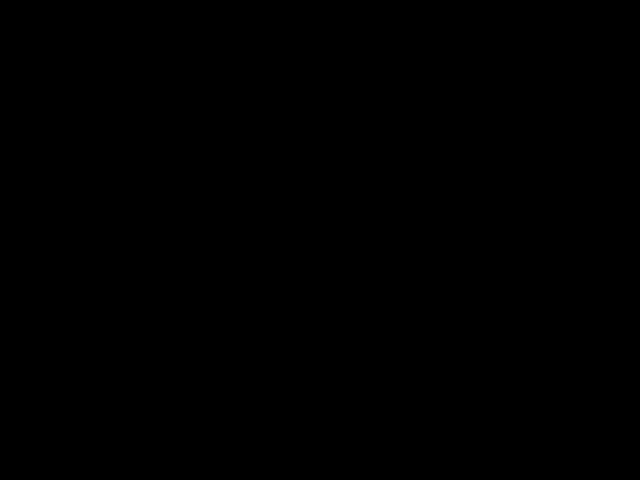

Multi-Colored Optical Flow Tracking:


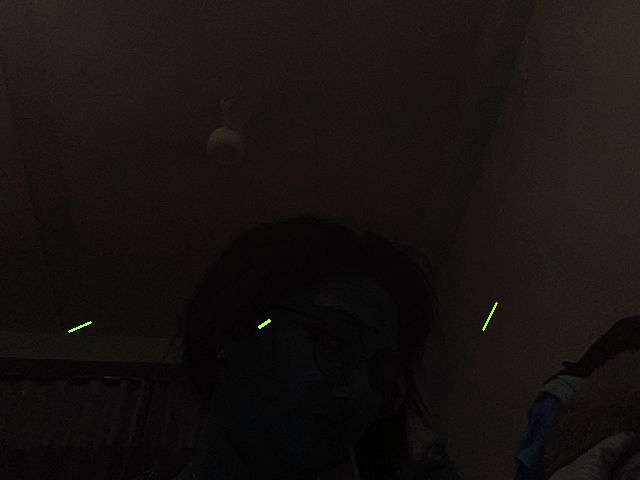

Edge Detection:


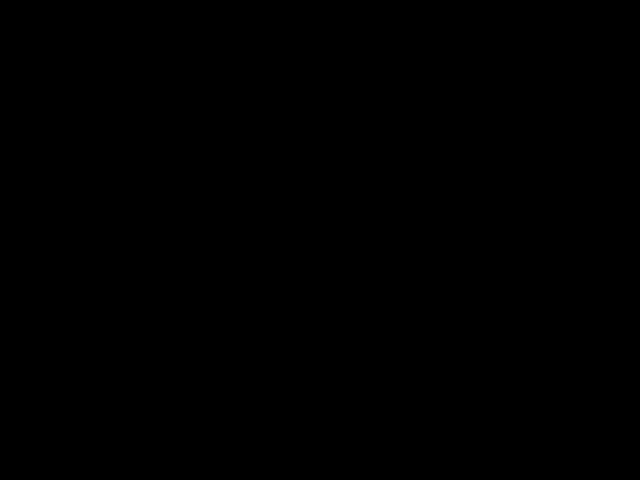

Multi-Colored Optical Flow Tracking:


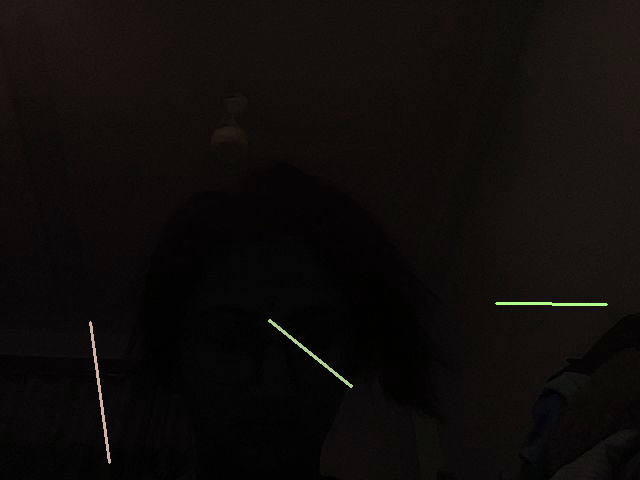

Edge Detection:


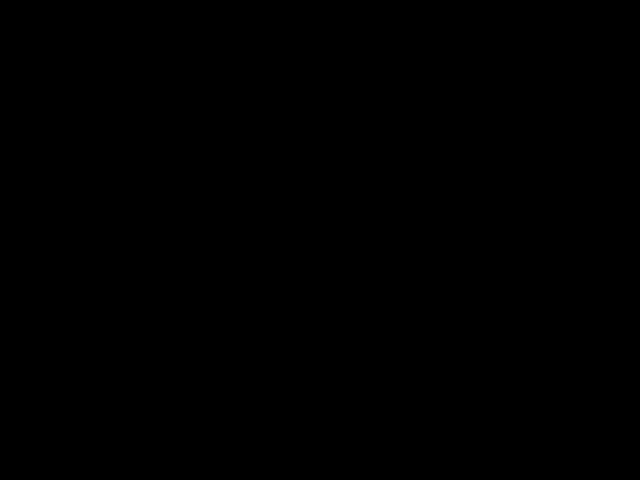

Multi-Colored Optical Flow Tracking:


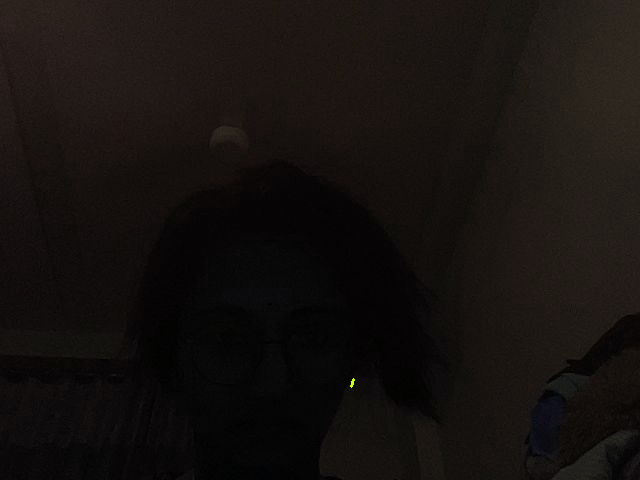

Edge Detection:


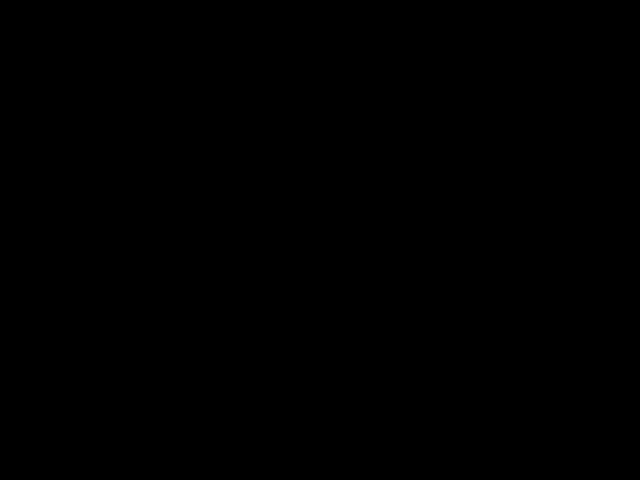

Multi-Colored Optical Flow Tracking:


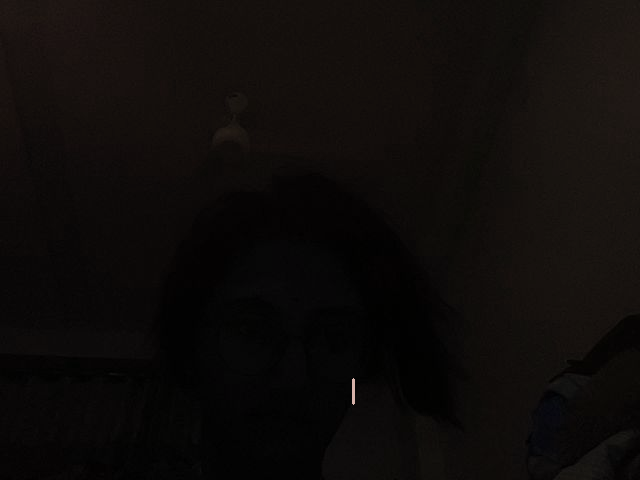

Edge Detection:


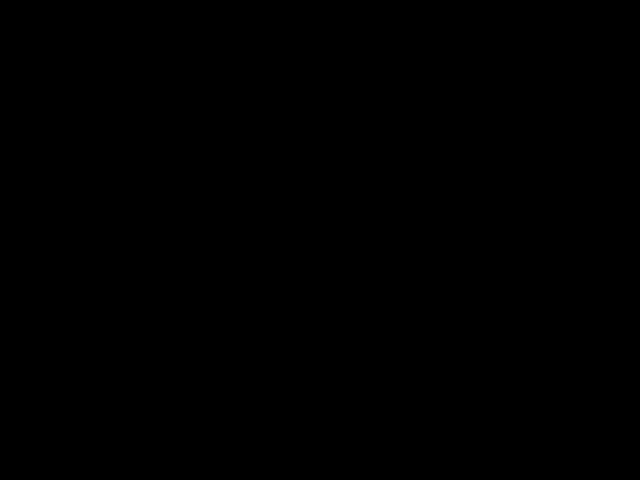

Multi-Colored Optical Flow Tracking:


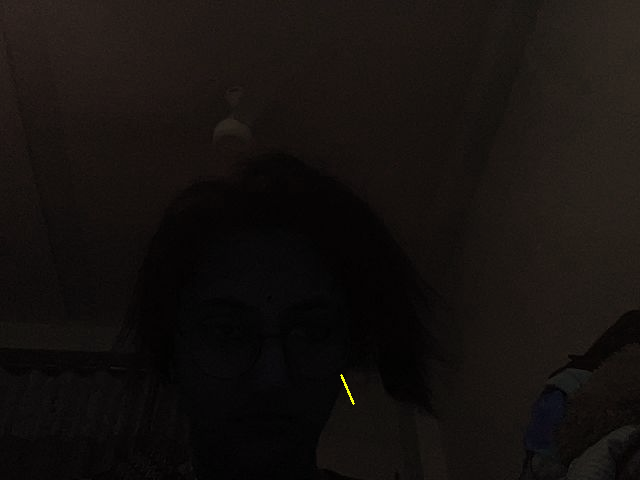

Edge Detection:


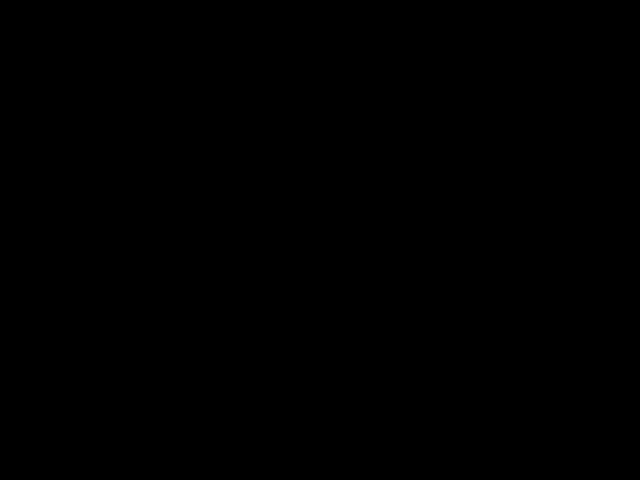

Multi-Colored Optical Flow Tracking:


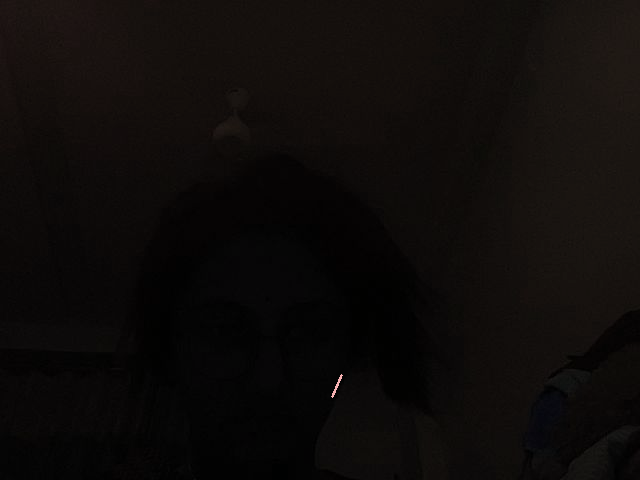

Edge Detection:


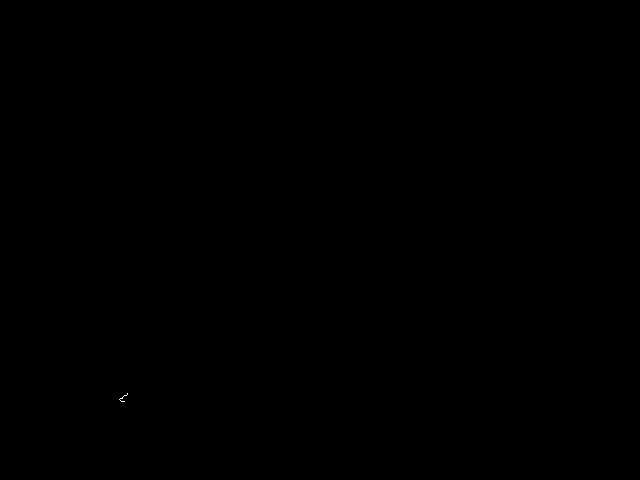

Multi-Colored Optical Flow Tracking:


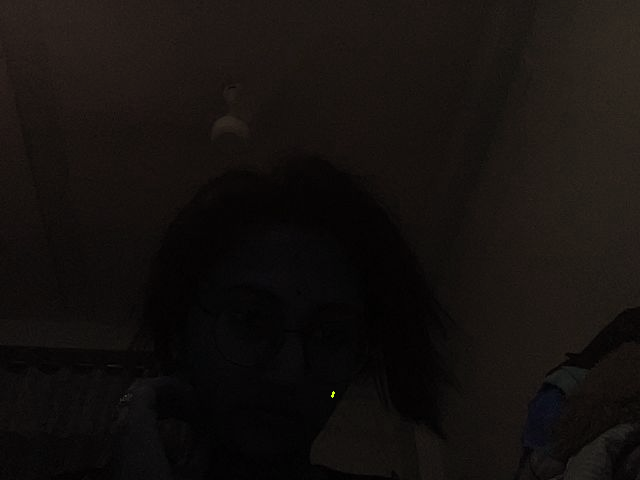

Edge Detection:


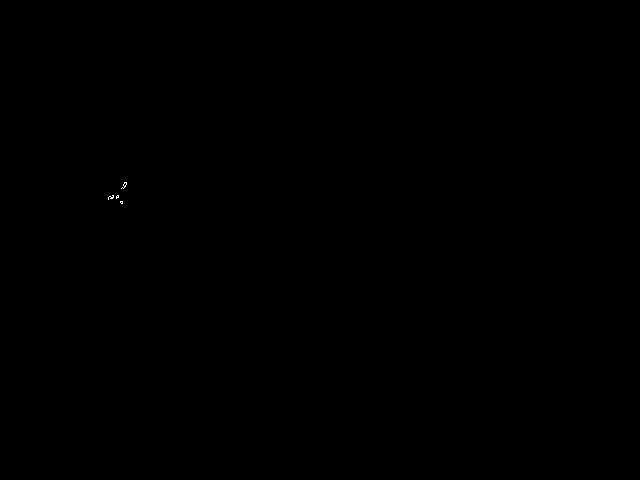

Multi-Colored Optical Flow Tracking:


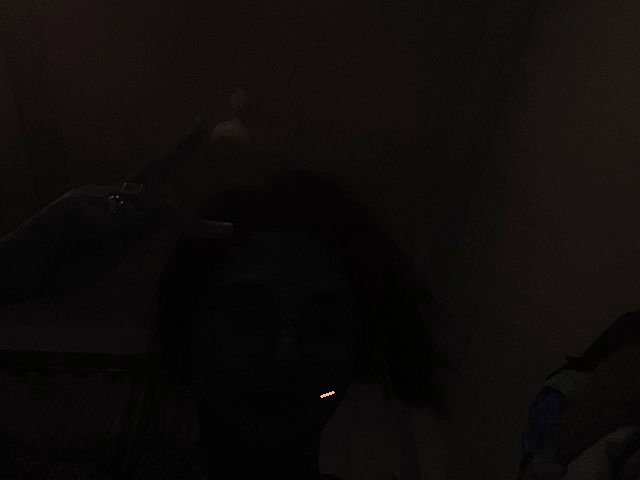

Edge Detection:


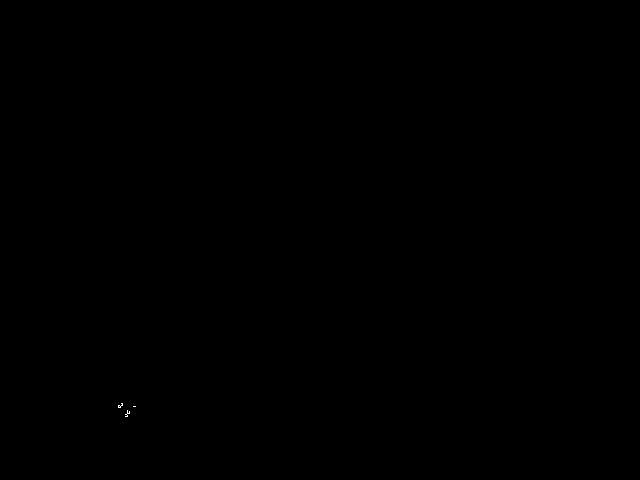

Multi-Colored Optical Flow Tracking:


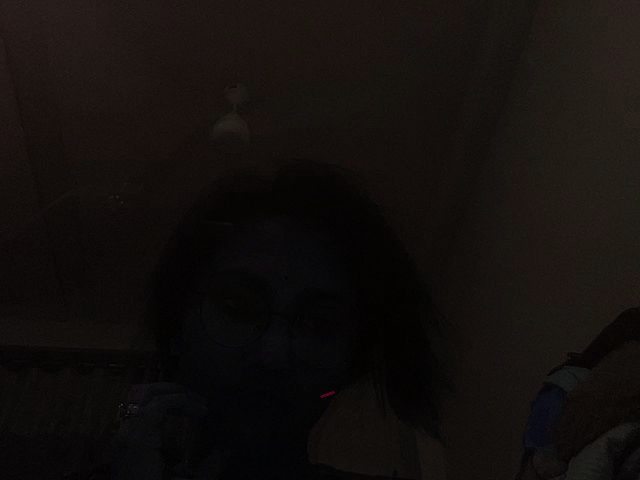

Edge Detection:


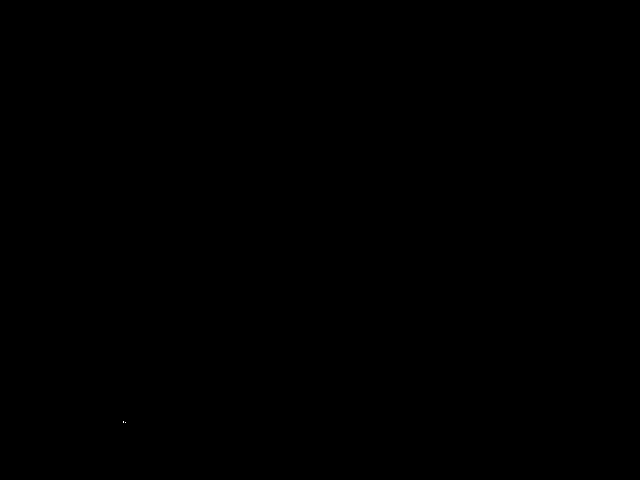

Multi-Colored Optical Flow Tracking:


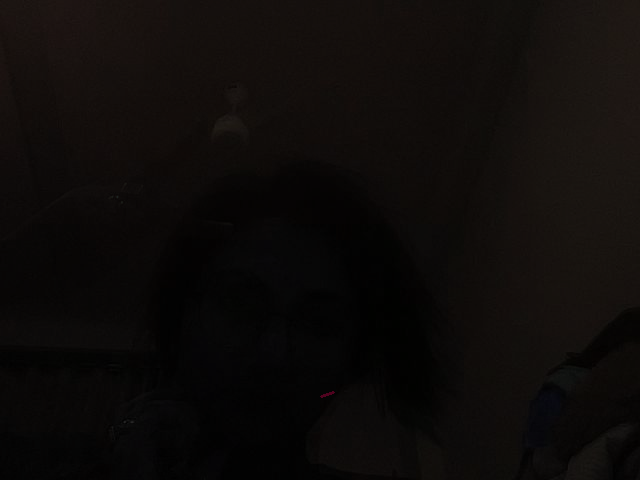

Edge Detection:


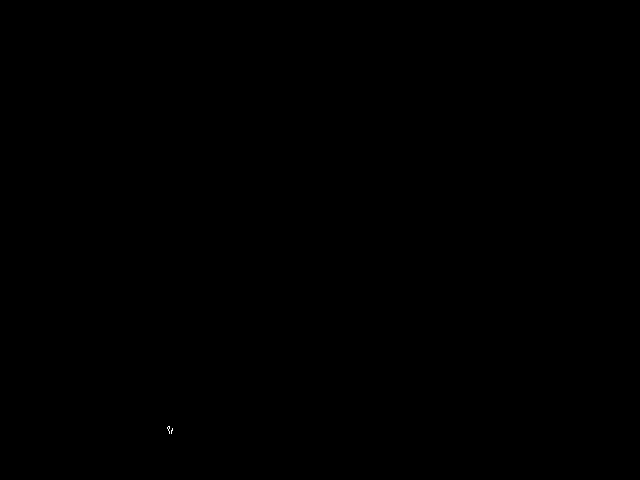

Multi-Colored Optical Flow Tracking:


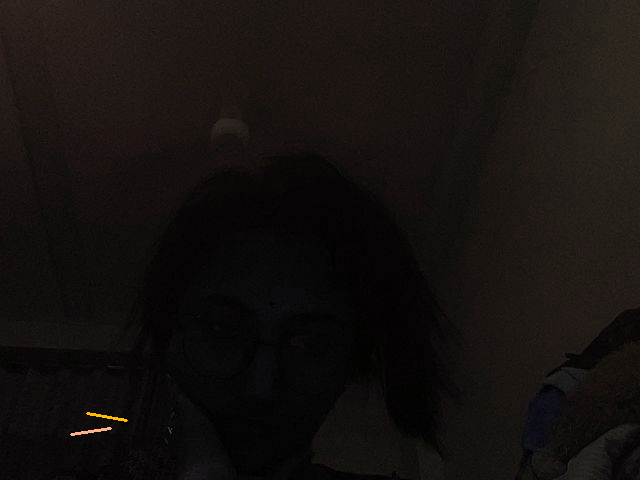

Simulation Complete!


In [ ]:
import cv2
import numpy as np
import time
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import PIL.Image
import io

# JavaScript to capture webcam frames
def take_photo():
    js_code = '''
        async function takePhoto() {
            const video = document.createElement('video');
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            video.srcObject = stream;
            await new Promise((resolve) => video.onloadedmetadata = resolve);
            video.play();

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0, canvas.width, canvas.height);

            stream.getTracks().forEach(track => track.stop());
            return canvas.toDataURL('image/jpeg', 0.8);
        }
        takePhoto();
    '''
    return eval_js(js_code)

# Capture an initial frame
def get_frame():
    image_data = take_photo()
    image_bytes = b64decode(image_data.split(',')[1])
    image = PIL.Image.open(io.BytesIO(image_bytes))
    return np.array(image)

# Get first frame
old_frame = get_frame()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_RGB2GRAY)

# Parameters for feature detection and optical flow
feature_params = dict(maxCorners=200, qualityLevel=0.3, minDistance=7, blockSize=7)
lk_params = dict(winSize=(15, 15), maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Detect initial features
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

# Create HSV mask for colored optical flow
hsv_mask = np.zeros_like(old_frame)
hsv_mask = cv2.cvtColor(hsv_mask, cv2.COLOR_RGB2HSV)
hsv_mask[..., 1] = 255  # Max saturation

# Process webcam frames
for i in range(15):  # Capture 15 frames
    frame = get_frame()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply Edge Detection (Feature Extraction)
    edges = cv2.Canny(frame_gray, 100, 200)

    # Compute Optical Flow
    if p0 is not None and len(p0) > 0:
        p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

        if p1 is not None and st is not None:
            good_new = p1[st == 1]
            good_old = p0[st == 1]

            # Compute motion vectors
            for new, old in zip(good_new, good_old):
                a, b = new.ravel()
                c, d = old.ravel()

                # Compute angle of motion for coloring
                dx, dy = a - c, b - d
                angle = np.arctan2(dy, dx)  # Get angle in radians
                hue = int(((angle + np.pi) / (2 * np.pi)) * 180)  # Convert angle to HSV hue range

                # Draw motion vector with color based on direction
                hsv_mask = cv2.line(frame, (int(c), int(d)), (int(a), int(b)), (hue, 255, 255), 2)

            p0 = good_new.reshape(-1, 1, 2)
        else:
            p0 = cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)
    else:
        p0 = cv2.goodFeaturesToTrack(frame_gray, mask=None, **feature_params)

    # Convert HSV to BGR for display
    flow_bgr = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)

    # Blend with original frame
    output = cv2.addWeighted(frame, 0.7, flow_bgr, 0.3, 0)

    # Display results
    print("Edge Detection:")
    cv2_imshow(edges)
    print("Multi-Colored Optical Flow Tracking:")
    cv2_imshow(output)

    old_gray = frame_gray.copy()

print("Simulation Complete!")
